<a href="https://colab.research.google.com/github/pablillo77/nlp_and_deep_learning/blob/main/DS_NLP_DeepLearning_Final_Pablo_Gim%C3%A9nez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 🎬 Introduction 🎬</b></div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🧹 Preliminary data cleaning 🧹</b></div>

## Presentation ##
The present project is based on a Kaggle dataset about BBC articles. The objective is to train and produce an algorithm for accurate news classification into five categories, that could yield commericial applications, customizing user engagement and giving insights for targeted audiences.

## Audience ##

This includes both readers seeking relevant content and businesses interested in market research, who could use categorized news for industry insights.

## Comercial Context ##

Personalized content delivery could improve user satisfaction and time spent on the platform. The classified data could also be valuable to marketing advertisers for audience targeting.

## Key Hypotheses and Questions ##

- Effective categorization and personalized news recommendations enhance reader engagement and retention.
- How the categories are distributed?
- Can we predict categories in new content?

## Objectives ##

- Produce an accurate classification model using LSTM and or RNN.
- Acquire category-based insights.
- Set the bases for future work on trending category predictions.





 </b></div>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⏳Libraries imports and data upload⏳
 </b></div>

In [10]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import string
import random


from collections import Counter
from wordcloud import WordCloud

# Sklearn mainly for model evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# NLTK for text processing
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Tensorflow for creating and LSTM model
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [11]:
#dataset load from github

#https://www.kaggle.com/code/dnkumars/lstm-model-bbc-articles-dataset/notebook?select=bbc_text_cls.csv
url = 'https://raw.githubusercontent.com/pablillo77/nlp_and_deep_learning/refs/heads/main/bbc_text_cls.csv'
df = pd.read_csv(url)
df.shape

(2225, 2)

In [12]:
#Some quick checks

pd.set_option('display.max_colwidth',None)
print("Data shape: ",df.shape)
print("Data types: ",df.dtypes)
df.sample(2)

Data shape:  (2225, 2)
Data types:  text      object
labels    object
dtype: object


,text,labels
223,"Man Utd to open books to Glazer\n\nManchester United's board has agreed to give US tycoon Malcolm Glazer access to its books.\n\nEarlier this month, Mr Glazer presented the board with detailed proposals on an offer to buy the football club. In a statement, the club said it would allow Mr Glazer ""limited due diligence"" to give him the opportunity to take the proposal on to a formal bid. But it said it continued to oppose Mr Glazer's plans, calling his assumptions ""aggressive"" and his plan ""damaging"". Many of Manchester United's supporters own shares in the club, and the fan-based group Shareholders United is strongly opposed to any takeover by Mr Glazer. About 300 fans protested outside the Old Trafford ground two days ago.\n\nRival local club Manchester City has pleaded with visiting fans not to protest inside its ground when the two teams play a televised match on Sunday.\n\nManchester United's response comes as little surprise, as the board made clear. ""Any board has a responsibility to consider a bona fide offer proposal,"" the club said in its statement. Should it become a firm offer, it should be at a price that ""the board is likely to regard as fair"" and on terms which ""may be deliverable"". But it also stressed that it stayed opposed to Mr Glazer's proposal. ""The board continues to believe that Mr Glazer's business plan assumptions are aggressive,"" the statement said, ""and the direct and indirect financial strain on the business could be damaging."" Whether or not the bid is attractive in monetary terms, in the case of Manchester United many investors hold the stock for sentimental rather than financial reasons. At present, Mr Glazer and his family hold a 28.1% stake, making them Manchester United's second biggest shareholders. They own the successful Tampa Bay Buccaneers American football team based in Florida. If the family makes a formal offer, they will need the support of the club's biggest shareholders.\n\nIrish horse racing millionaires JP McManus and John Magnier own 29% of United through their investment vehicle Cubic Expression, and have yet to express a view on the bid approach.\n\nA group of five MPs are calling on the Department of Trade and Industry to block any takeover of the club by the US football magnate on public interest grounds. They have signed a House of Commons motion, and Tony Lloyd, the Manchester Central MP, whose constituency includes the club's Old Trafford ground, has pledged to take the matter ""to Tony Blair if necessary"". The Commons motion says ""any takeover designed to transform the club into a private company would be against the interests of those supporters and football"". However, the DTI has dismissed the proposal. A spokesman said the department did not believe there was a case for changing the Enterprise Act so that takeovers of football clubs could be looked at on non-competition grounds. Mr Glazer's offer values the club at £800m ($1.5bn). Pitched at 300p per share, it also relies less on debt to finance it than an earlier approach from the US tycoon, which was rejected out of hand. Manchester United shares closed at 270.25p on Friday, down 3.75p on the day.",business
178,"Irish duo could block Man Utd bid\n\nIrishmen JP McManus and John Magnier, who own a 29% stake in Manchester United, will reportedly reject any formal £800m offer for the club.\n\nThe Sunday Times and The Sunday Telegraph say they will oppose any formal £800m takeover bid from US tycoon Malcom Glazer. Mr Glazer got permission to look at the club's accounts last week. Irish billionaires Mr McManus and Mr Magnier are said to believe that an £800m bid undervalues club prospects.\n\nMr Magnier and Mr McManus, who hold their stake through their Cubic Expression investment vehicle have the power to block a bid. Mr Glazer's financial backers, including JP Morgan, the US investment bank have said they won't back a bid unless it receives backing from the owners of at least 75% of the

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Insight:</font></h3>

* We can appreciate the dataset has 2 columns, text and labels, consiting of 2225 entries. The data types are objects, "text" will be converted to string for further processing, and the labels will be encoded.
* In the random sample we see numbers, speciall chars such as new line characters that do not add value to the categorization, stop words and capital letters.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🔎 Exploratory Data Analysis (EDA).🔎</b></div>

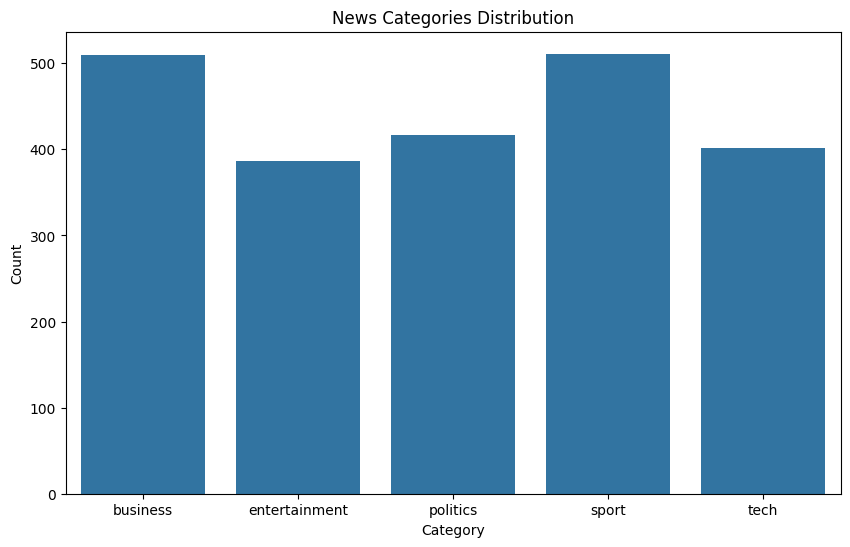

In [16]:
# Check categories distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='labels', data=df)
plt.title(f'News Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


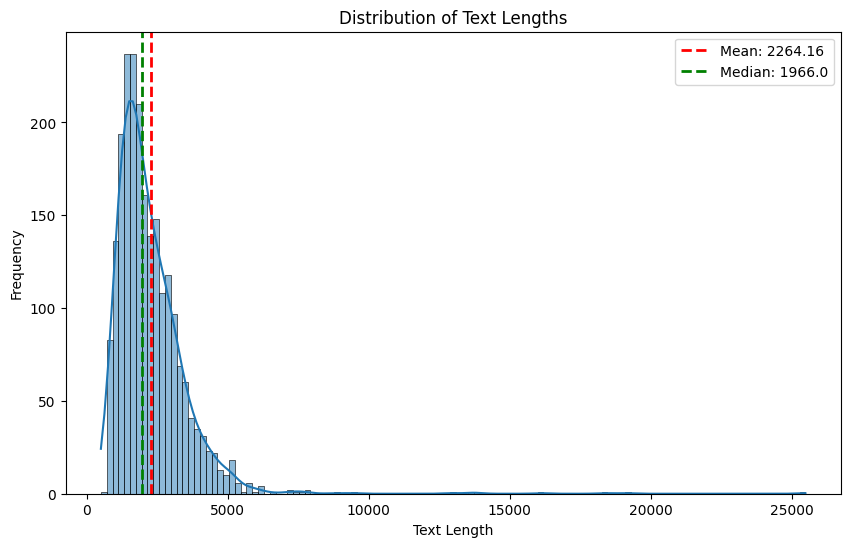

In [22]:
# Checking Text lenghts
mean_length = df['text_length'].mean()
median_length = df['text_length'].median()

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_length}')

plt.legend()
plt.show()

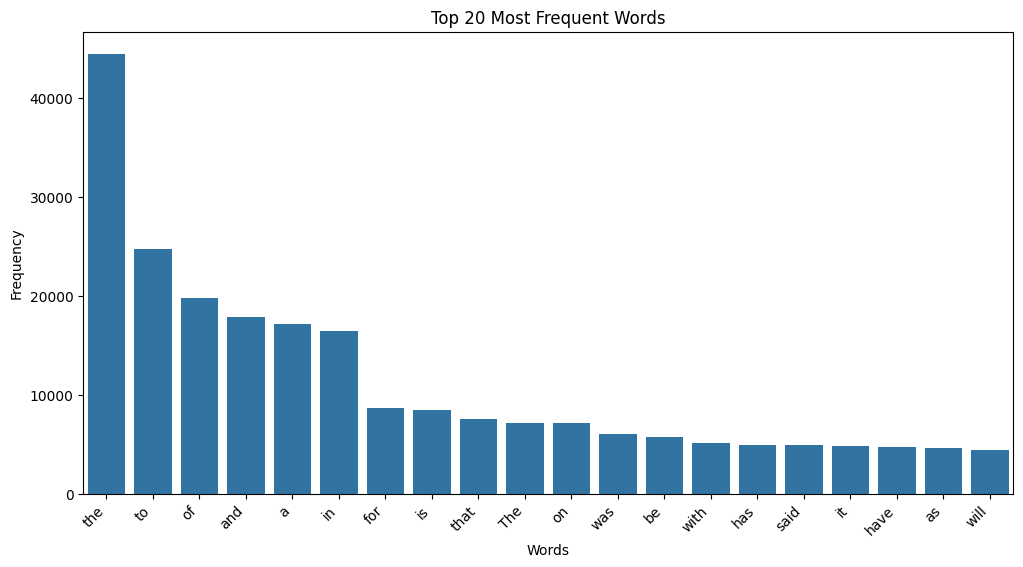

In [23]:
# prompt: count plot of the top 20 most frequent words in df[text] without removing stopwords, nor converting to lowercase, nor removing punctuation, raw as it is

from collections import Counter

# Assuming 'df' and 'text' column exist as in the provided code
word_counts = Counter(" ".join(df['text']).split())
top_20_words = word_counts.most_common(20)

# Extract words and counts for plotting
words, counts = zip(*top_20_words)

# Create the countplot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.show()

Text(0.5, 1.0, 'Sport Articles')

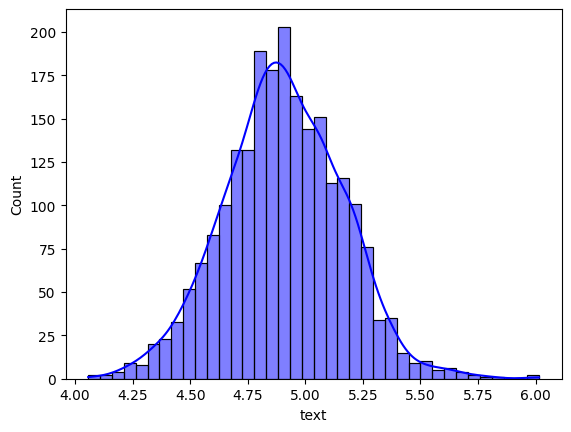

In [34]:
# For sport articles
word_length = df['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(word_length.map(lambda x: np.mean(x)),color='blue', kde=True)
ax_sport.set_title('Sport Articles', size=12)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Insight:</font></h3>

* In the top 20 most frequent words we can see the effect of the stopwords.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🧹 Data cleanup 🧹</b></div>

In [9]:
df_clean = df.copy()
df_clean['text'] = df_clean['text'].astype(str)	 # Convert to string before regex
df_clean['text'] = (
    df_clean['text']
    .str.replace(r'\d+', '', regex=True)           # Remove digits
    .str.replace(r'[^\w\s]', '', regex=True)        # Remove special characters except for word chars and whitespace
    .str.replace(r'\n', ' ', regex=True)            # Replace newlines with space
    .str.replace(r'\\', '', regex=True)             # Remove any remaining backslashes
    .str.replace(r'"', '', regex=True)              # Remove double quotes
    .str.strip()                                    # Trim leading/trailing whitespace
)
df_clean['text'] = df_clean['text'].str.lower() # Conversion to lowercase



,text,labels
1748,hantuchova in dubai last eight daniela hantuchova moved into the quarterfinals of the dubai open after beating elene likhotseva of russia and now faces serena williams australian open champion williams survived an early scare to beat russias elena bovina world number one lindsay davenport and anastasia myskina also progressed davenport defeated chinas jie zheng while french open champion myskina sailed through after her opponent marion bartoli retired hurt american davenport will now face fellow former wimbledon champion conchita martinez of spain who ousted seventhseeded nathalie dechy of france myskina will face eighthseed patty schnyder from switzerland who defeated chinas li na the other quarter final pits wild card sania mirza of india against jelena jankovic of serbia and montenegro who both won on tuesday before her meeting with martinez davenport believes there is some room for improvement in her game i started well and finished well but played some soso games in the middle she said williams was also far from content i dont know what i was doing there she said it was really windy and i hadnt played in the wind all my shots were going out of here but hantuchova is in upbeat mood ahead of her clash with the younger williams sister who was handed a firstround bye i feel i have an advantage over serena because i have already played two matches on these courts she said it is a difficult court to play on very fast and sometimes you feel you have no control over the ball,sport
1448,iranian misses israel match iranian striker vahid hashemian will not travel to israel for bayern munichs champions league match against maccabi tel aviv on wednesday the german club said the player had pulled out because of a back injury iran refuses to recognise israels right to exist and does not allow its citizens to travel to the country a bayern spokesman said on monday that the decision not to take hashemian to israel had been motivated only by his physical condition hes got back pain and he couldnt train the spokesman said it would have made no sense for him to go iran gave judo world champion arash miresmaeili a reward when he refused to fight an israeli at the athens olympics the international judo federation considered taking action against miresmaeili but concluded he had been overweight for the fight and could not have taken part,sport
1147,blair said he would stand down tony blair promised gordon brown he would stand down before the next election a new book about the chancellor claims but the prime minister changed his mind following intervention from allies in the cabinet according to the book the book by sunday telegraph journalist robert peston said the pair had mutual animosity and contempt for each other the book browns britain said tony blair felt by november he had lost voters trust the authors sources all unnamed allies of mr blair and mr brown said the prime minister felt the iraq war had undermined him and that he was no longer an asset to the labour party the book serialised in the sunday telegraph alleges that mr blair told the chancellor at a dinner hosted by deputy pm john prescott in november of his intention to stand down at that stage he saw gordon brown and said look you are the next most influential member of the government i need your help to get through the next year mr peston said i myself recognise that im going to have to stand down before the election but help me to get through the year and i will then stand down but he changed his mind in june following intervention from allies in the cabinet and the suspicion that the chancellor was deliberately manoeuvring against him the book claims mr peston told bbc news my understanding is that they are not nearly as close or as friendly as they once were what the book says is there now a pretty profound mutual mistrust mutual animosity i think in public you see this double act pretending everything is alright but in private i dont think the relationshi